In [62]:
%load_ext autoreload
%autoreload 1

import sys
sys.path.append('../src')

from data import news_articles, tone

%aimport data.news_articles
%aimport data.tone

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
# hit - candidates name appears in description
# and no other candidate name appears

# Fetch Data

In [73]:
articles = news_articles.fetch_for_range(query='democratic+primary', start_date='2/5/2020', end_date='3/2/2020')

In [76]:
big_articles = pd.DataFrame.from_records(articles)

In [65]:
with open('../data/interim/polls.pickle', 'rb') as read_file:
    poll_df = pickle.load(read_file)

# Analyze

In [88]:
from nltk import word_tokenize
from collections import Counter
from functools import reduce

candidates = ['biden', 'bloomberg', 'buttigieg', 'klobuchar', 'sanders', 'warren']

def count_mentions(text):
    if type(text) != str and np.isnan(text):
        return Counter()
    tokens = word_tokenize(text.lower())
    return Counter([w for w in tokens if w in candidates])

def label_candidate(text):
    if type(text) != str:
        return np.nan
    
    first_section = text[:300]
    counts = count_mentions(first_section)
    candidates_mentioned = list(counts.keys())

    if len(candidates_mentioned) == 1:
        return candidates_mentioned[0]
    return np.nan

In [84]:
big_articles['candidate_label'] = big_articles.description.map(label_candidate)
big_articles['published_date'] = big_articles.publishedAt.map(lambda d: pd.to_datetime(d).date())

In [95]:
article_count_by_cand = big_articles.groupby(['candidate_label', 'published_date']).description.agg('count').reset_index()
article_count_by_cand = article_count_by_cand.rename(columns={'description': 'num_articles'})
article_count_by_cand['total_articles'] = article_count_by_cand.groupby('published_date').num_articles.transform('sum')

## By Candidate

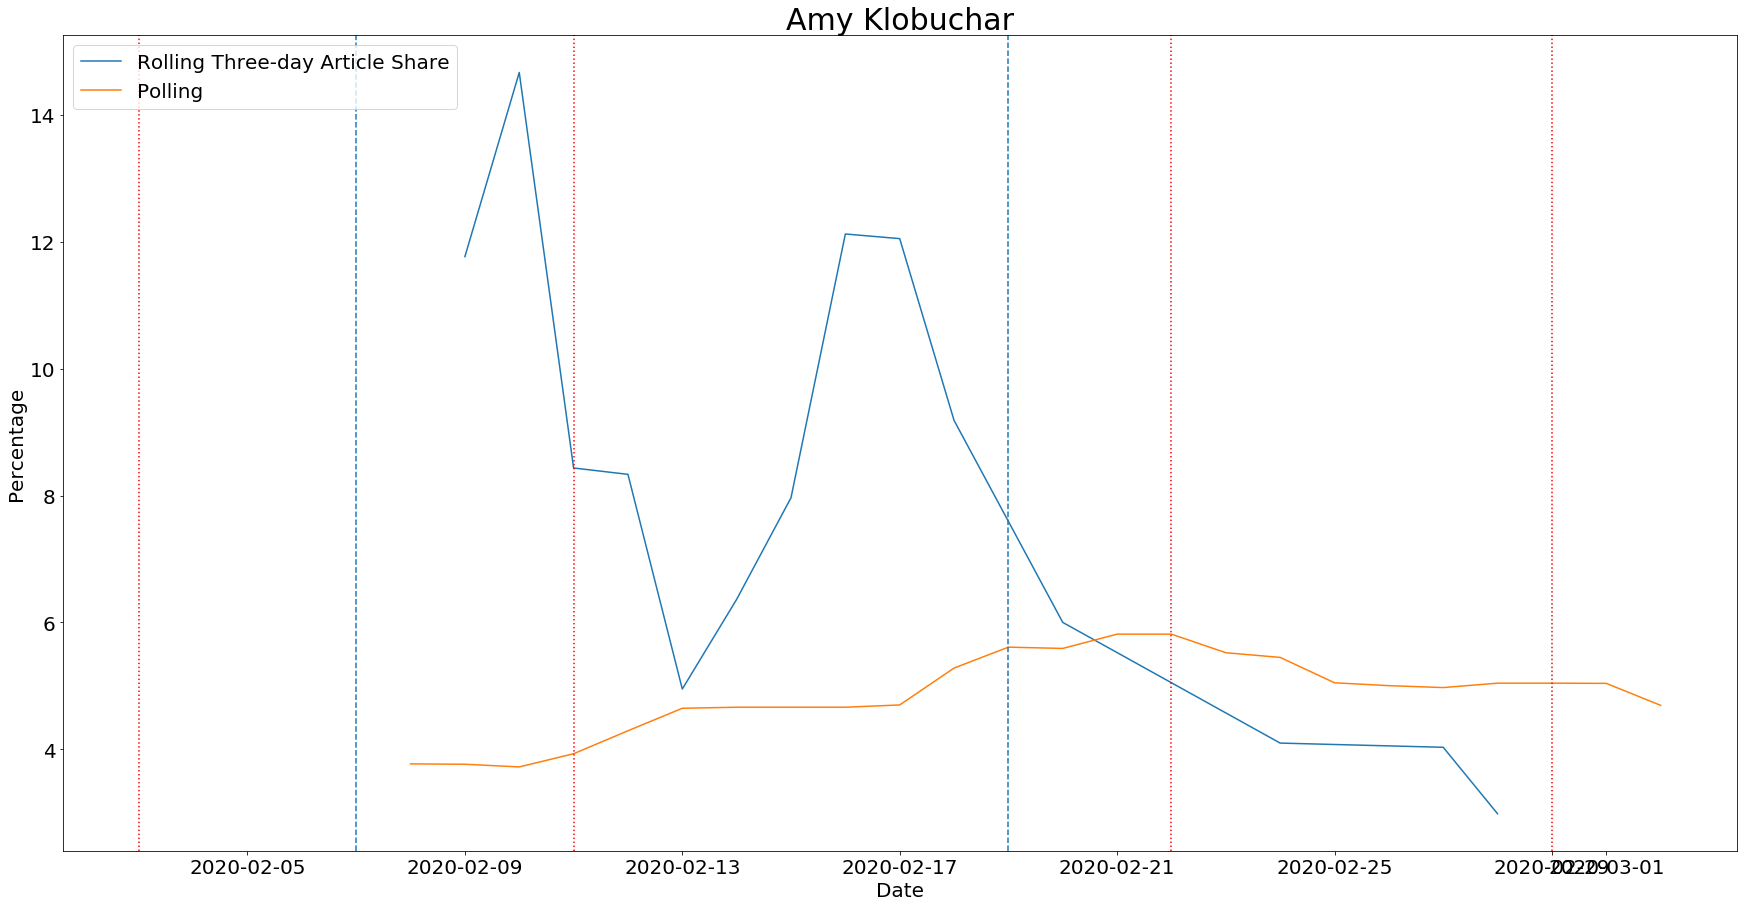

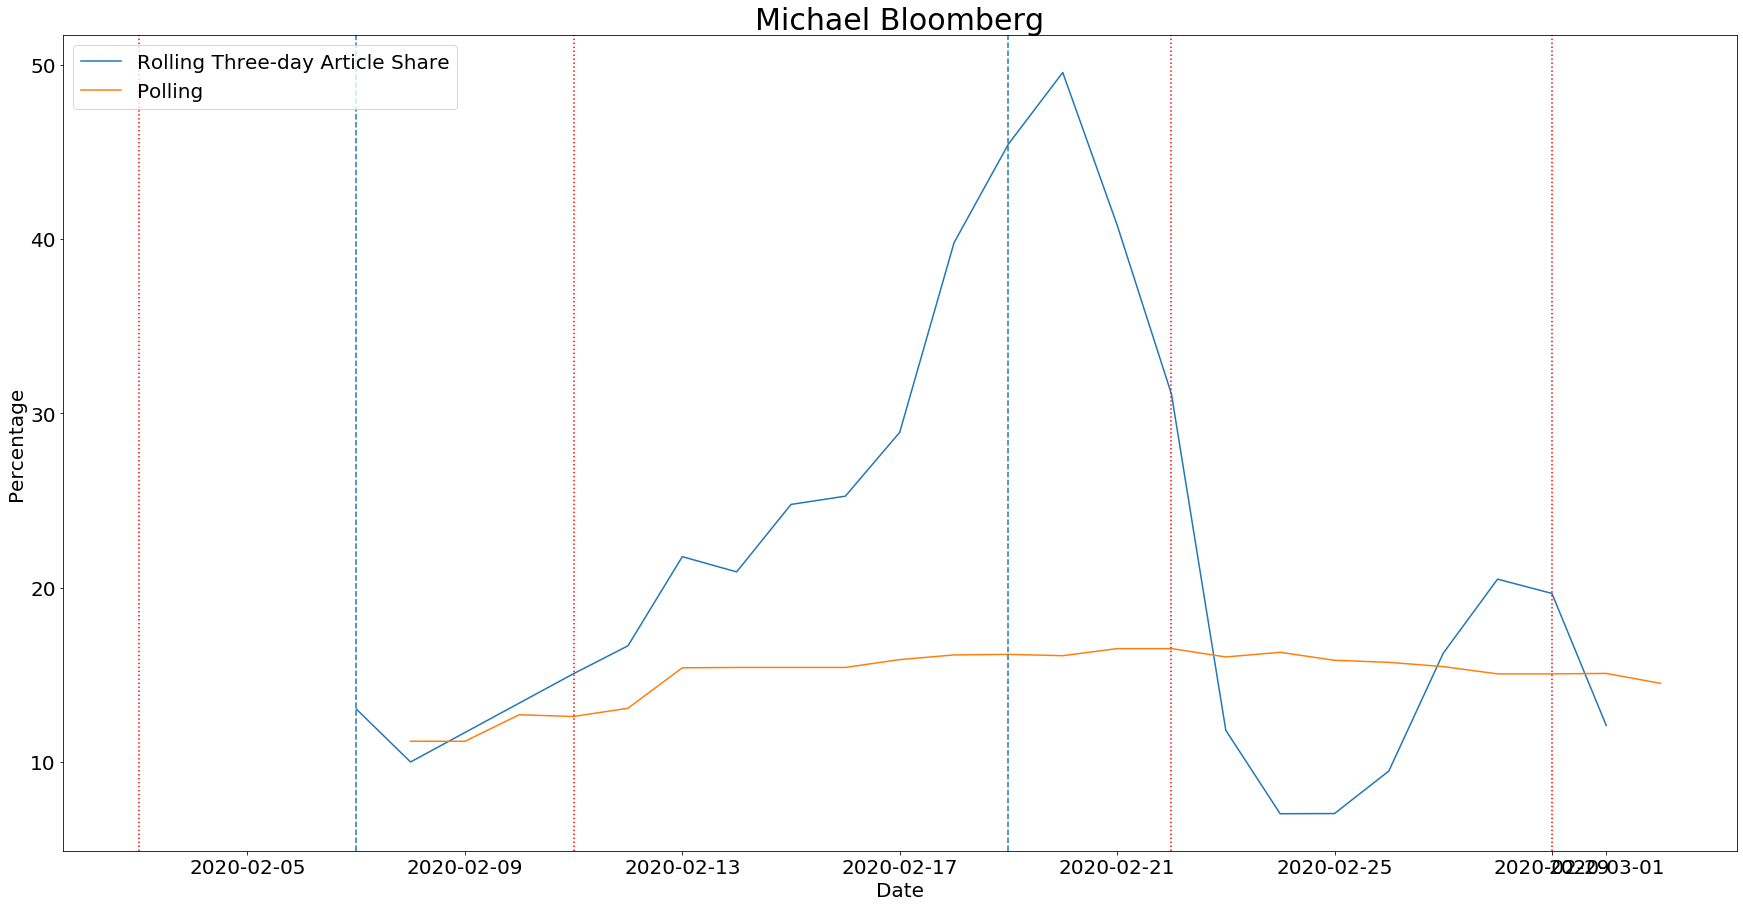

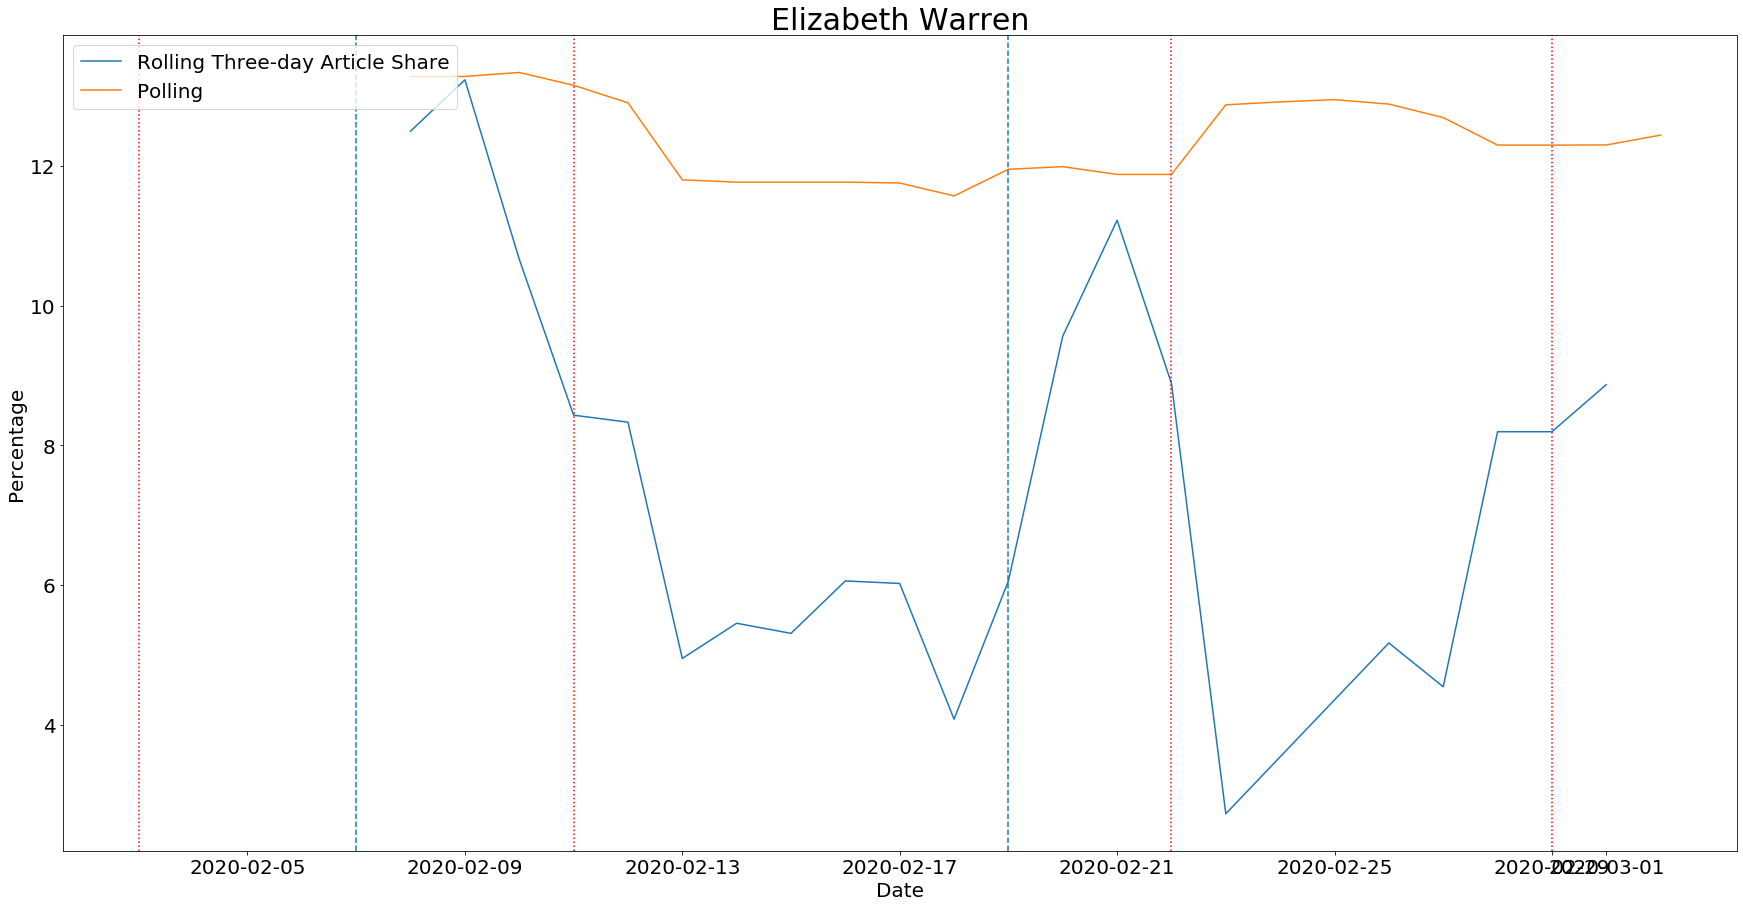

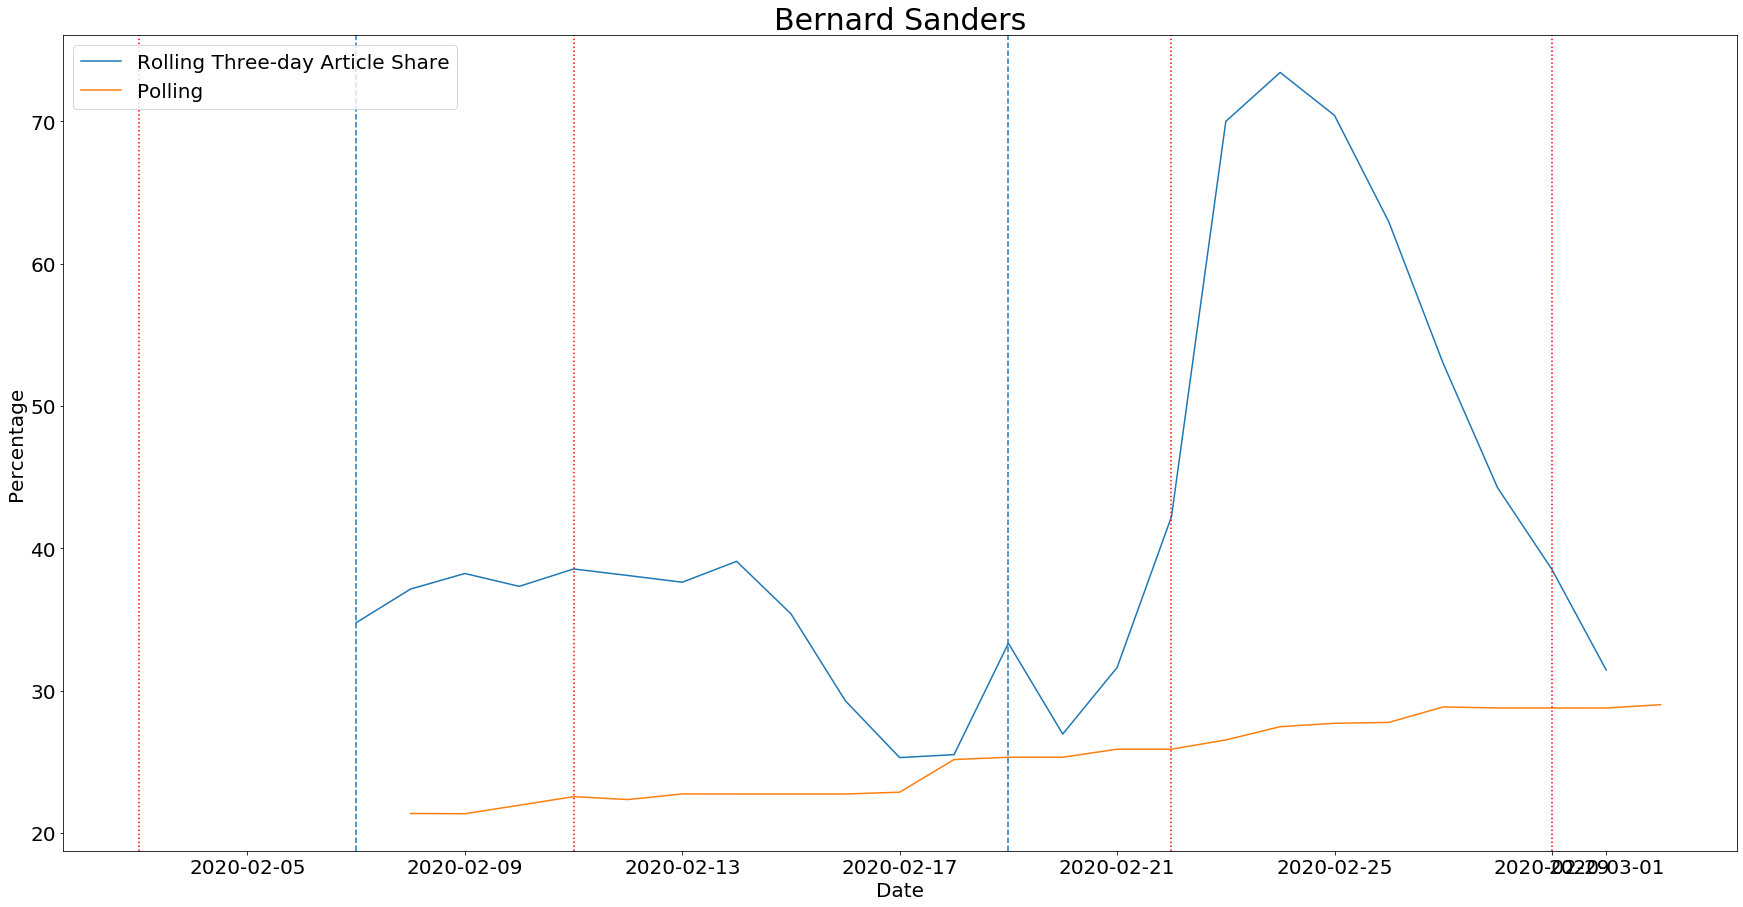

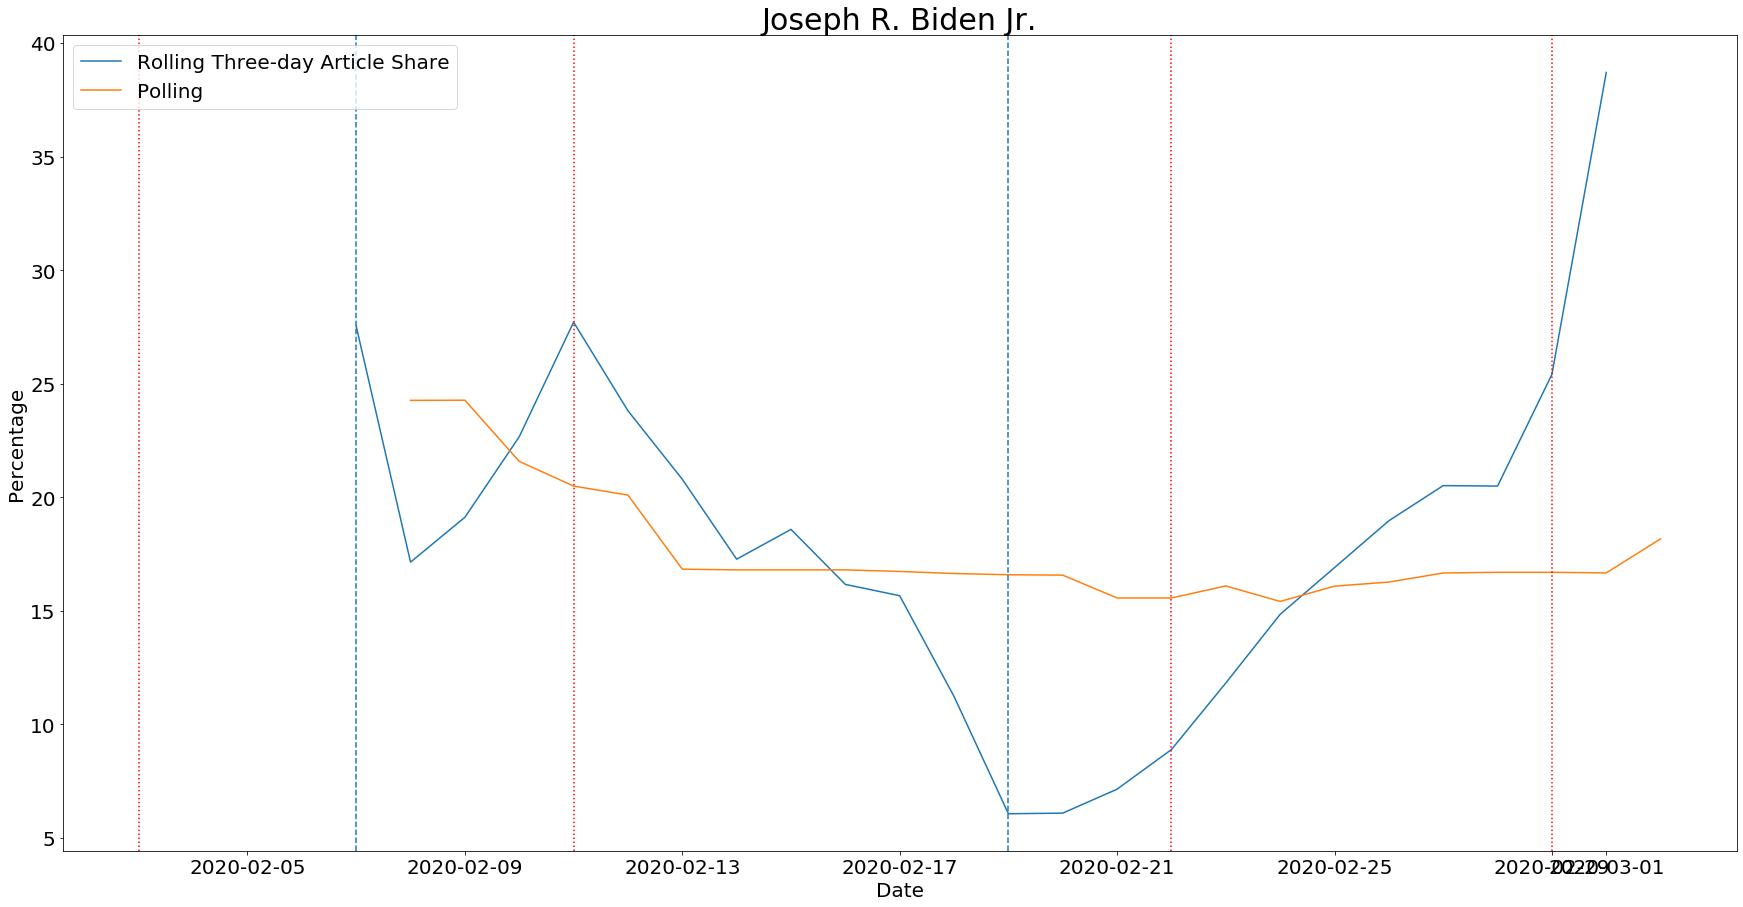

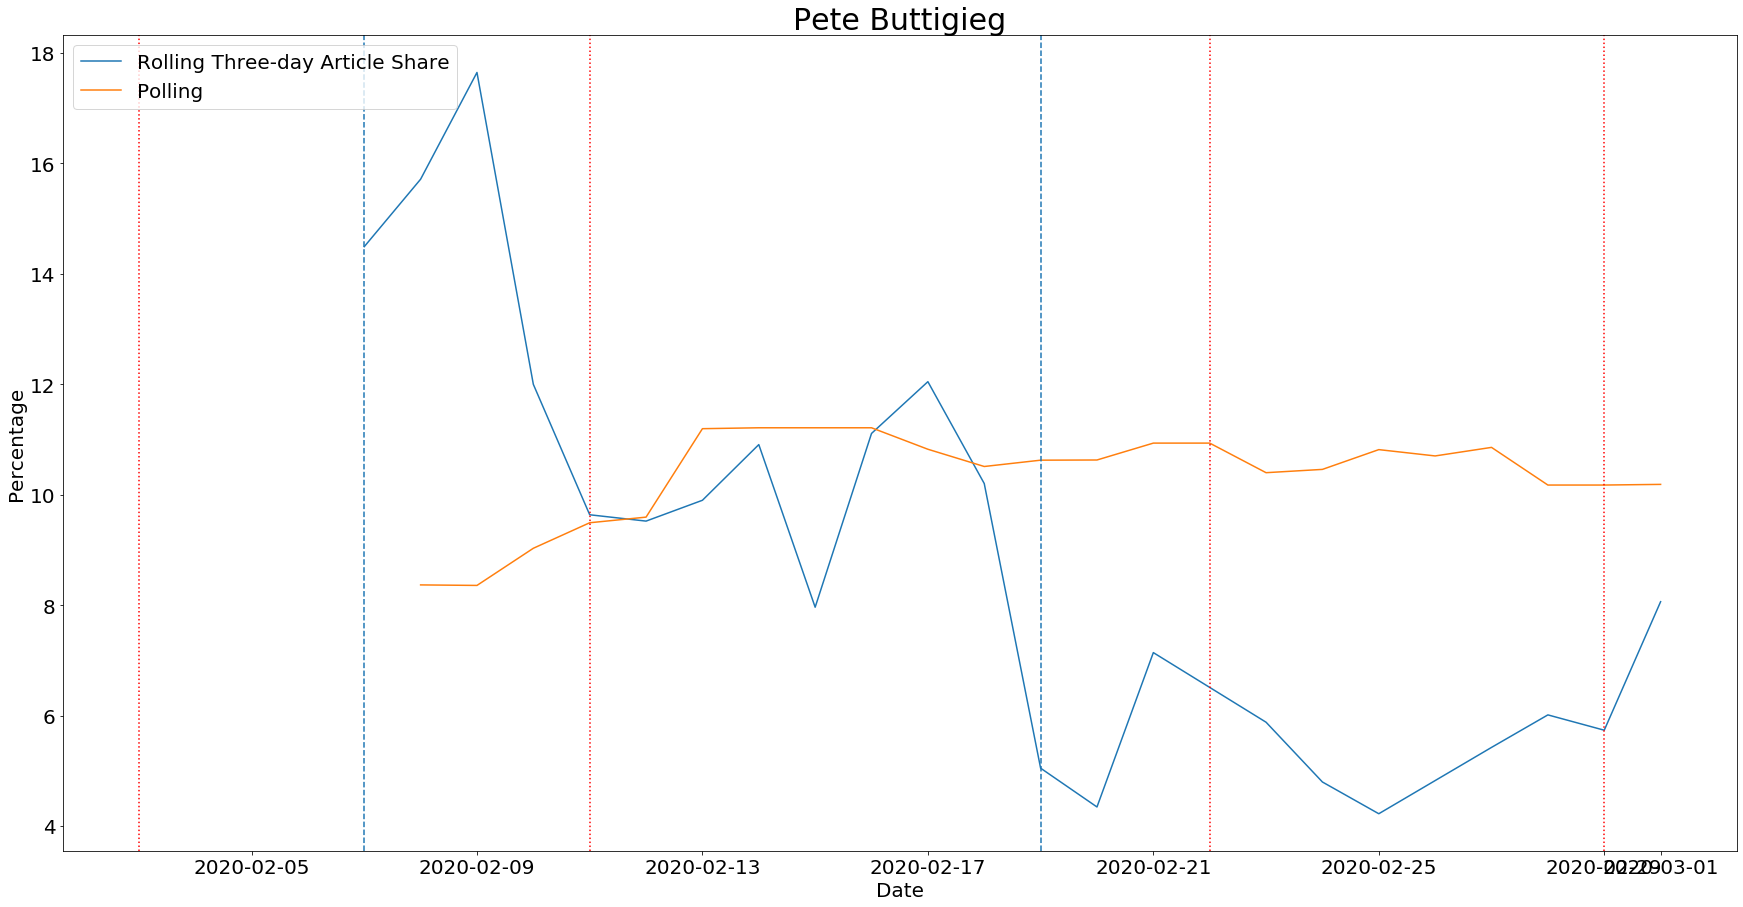

In [122]:
candidate_names = ['klobuchar',  'bloomberg',
                   'warren', 'sanders',  'biden', 'buttigieg']
polling_names = ['Amy Klobuchar', 'Michael Bloomberg',
                 'Elizabeth Warren', 'Bernard Sanders', 'Joseph R. Biden Jr.',
                 'Pete Buttigieg', ]

poll_graph = poll_df[poll_df.modeldate >= pd.to_datetime('2/8/2020')]

for name, poll_name in zip(candidate_names, polling_names):
    plt.figure(figsize=(30,15))
    
    media_data = article_count_by_cand[article_count_by_cand.candidate_label == name]
    perc_article_series = media_data.num_articles.rolling(window=3).mean() / media_data.total_articles.rolling(window=3).mean() * 100
    plt.plot(media_data.published_date, perc_article_series, label='Rolling Three-day Article Share')
    
    cand_data = poll_graph[(poll_graph.state == 'National') & (
        poll_graph.candidate_name == poll_name)]
    plt.plot(cand_data.modeldate, cand_data.pct_estimate, label='Polling')
    
    for d in debates:
        plt.axvline(pd.to_datetime(d), ls='--')
    for p in primaries:
        plt.axvline(pd.to_datetime(p), ls=':', c='red')

    plt.title(poll_name, fontsize=30)
    plt.ylabel('Percentage', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Date', fontsize=20)

    plt.legend(fontsize=20, loc='upper left')

# By Lane

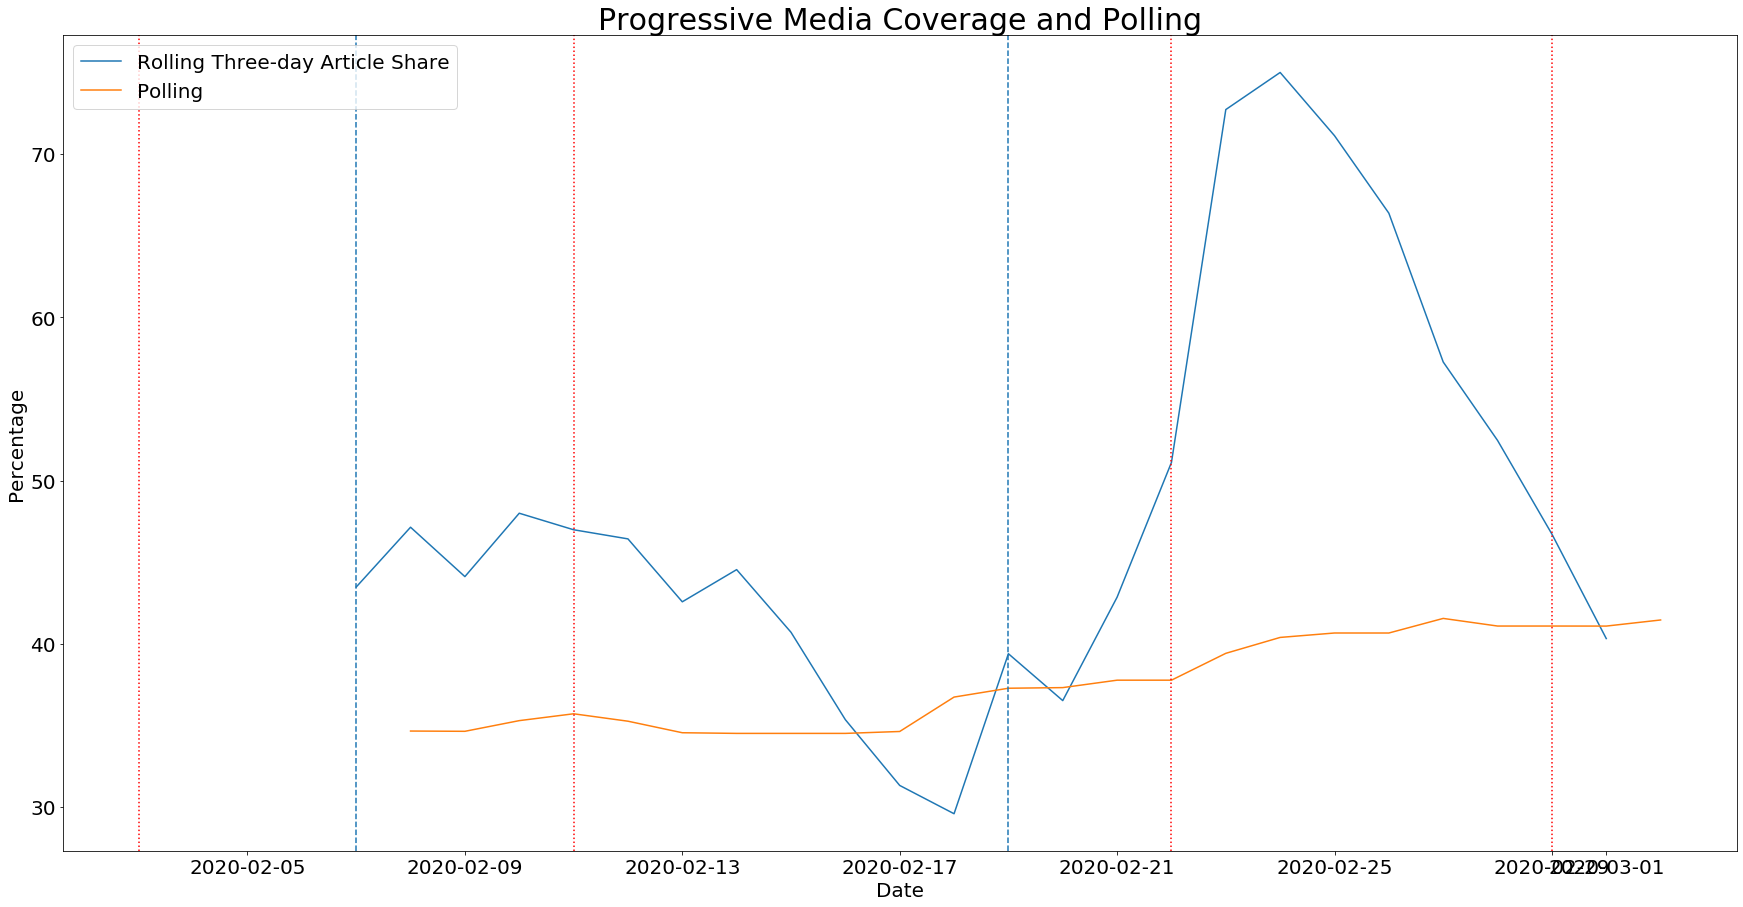

In [116]:
candidate_names = ['warren', 'sanders',  'biden',
                   'buttigieg', 'klobuchar',  'bloomberg', ]
polling_names = ['Elizabeth Warren', 'Bernard Sanders', 'Amy Klobuchar', 'Michael Bloomberg',
                 'Joseph R. Biden Jr.', 'Pete Buttigieg', ]
debates = [
  '2/19/2020',
  '2/7/2020',
]

primaries = ['2/29/2020', '2/22/2020', '2/11/2020', '2/3/2020']

poll_graph = poll_df[poll_df.modeldate >= pd.to_datetime('2/8/2020')]

plt.figure(figsize=(30, 15))

media_data = article_count_by_cand[article_count_by_cand.candidate_label.isin(candidate_names[:2])]
plt.plot(
    media_data.groupby('published_date').num_articles.sum().index,
    (media_data.groupby('published_date').num_articles.sum().rolling(window=3).mean() /
    media_data.groupby('published_date').total_articles.mean().rolling(window=3).mean() * 100),
    label='Rolling Three-day Article Share')
cand_data = poll_graph[(poll_graph.state == 'National') & (
    poll_graph.candidate_name.isin(polling_names[:2]))]
plt.plot(
    cand_data.groupby('modeldate').pct_estimate.agg('sum').index,
    cand_data.groupby('modeldate').pct_estimate.agg('sum').values,
    label='Polling')
for d in debates:
    plt.axvline(pd.to_datetime(d), ls='--')
for p in primaries:
    plt.axvline(pd.to_datetime(p), ls=':', c='red')
    
plt.title('Progressive Media Coverage and Polling', fontsize=30)
plt.ylabel('Percentage', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize=20)

plt.legend(fontsize=20, loc='upper left')

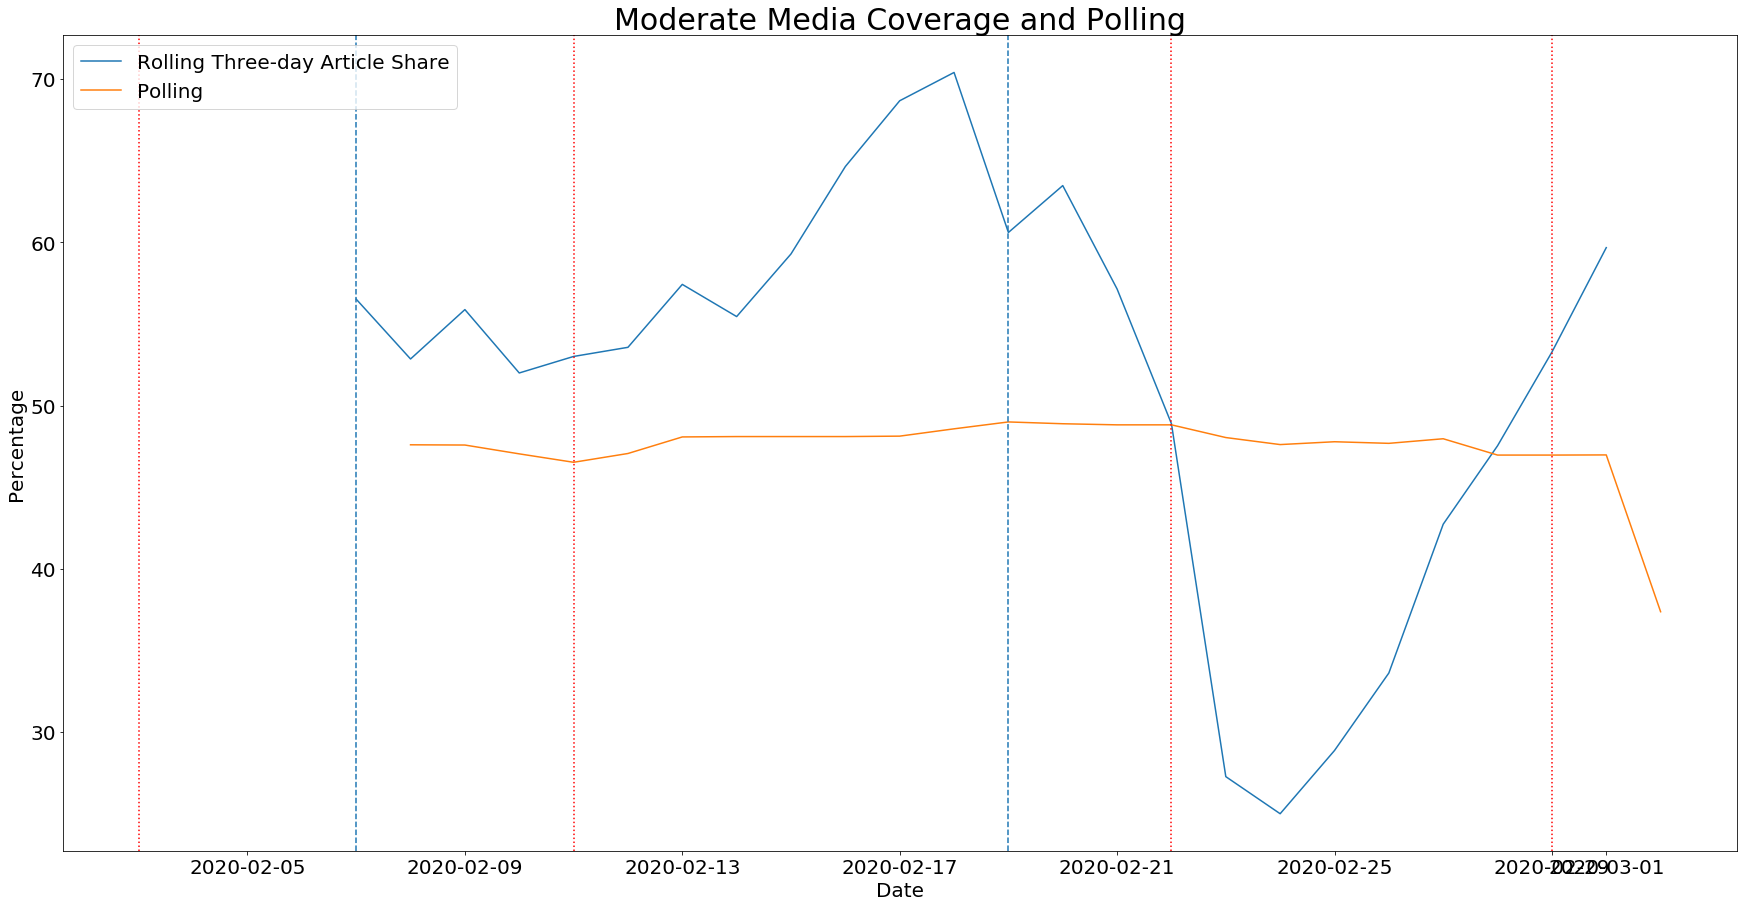

In [120]:
candidate_names = ['warren', 'sanders',  'biden',
                   'buttigieg', 'klobuchar',  'bloomberg', ]
polling_names = ['Elizabeth Warren', 'Bernard Sanders', 'Amy Klobuchar', 'Michael Bloomberg',
                 'Joseph R. Biden Jr.', 'Pete Buttigieg', ]

poll_graph = poll_df[poll_df.modeldate >= pd.to_datetime('2/8/2020')]

plt.figure(figsize=(30, 15))

media_data = article_count_by_cand[article_count_by_cand.candidate_label.isin(candidate_names[2:])]
plt.plot(
    media_data.groupby('published_date').num_articles.sum().index,
    (media_data.groupby('published_date').num_articles.sum().rolling(window=3).mean() /
    media_data.groupby('published_date').total_articles.mean().rolling(window=3).mean() * 100),
    label='Rolling Three-day Article Share')
cand_data = poll_graph[(poll_graph.state == 'National') & (
    poll_graph.candidate_name.isin(polling_names[2:]))]
plt.plot(
    cand_data.groupby('modeldate').pct_estimate.agg('sum').index,
    cand_data.groupby('modeldate').pct_estimate.agg('sum').values,
    label='Polling')

for d in debates:
    plt.axvline(pd.to_datetime(d), ls='--')
for p in primaries:
    plt.axvline(pd.to_datetime(p), ls=':', c='red')

plt.title('Moderate Media Coverage and Polling', fontsize=30)
plt.ylabel('Percentage', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize=20)

plt.legend(fontsize=20, loc='upper left')

In [ ]:
# check correlations btwn intra-lane candidates for both polling and media coverage

In [ ]:
# check for differences in tone/sentiment for each side